# Lead Scoring Case Study

## Problem Statement

#### An education company named X Education sells online courses to industry professionals.The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.When these people fill up a form providing their email address or phone number, they are classified to be a lead.
#### Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not.The typical lead conversion rate at X education is around 30%.


## Business Goal

#### Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

Importing Necessary Libraries

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [8]:
#readoing the file
Leads_df=pd.read_csv("Leads.csv")
Leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
#Checking shape of the data
Leads_df.shape

(9240, 37)

In [10]:
#Checking the summary of data
Leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [11]:
#Checking the null percentage in each variables
Leads_df.isnull().sum().sort_values(ascending=False)/len(Leads_df)*100

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [12]:
#since the Null values are more than 25% we can remove those variables as they come in the category of MCAR - missing completely at random
Leads_df=Leads_df.drop(["Lead Quality","Asymmetrique Activity Index","Asymmetrique Profile Score",
                        "Asymmetrique Activity Score","Asymmetrique Profile Index","Tags", "Lead Profile", 
                        "What matters most to you in choosing a course","What is your current occupation"],axis=1)

In [13]:
Leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,Mumbai,No,No,Modified


Some of the columns values have same values as "NO" which are as follows:-

* Magazine
* Receive More Updates About Our Courses
* Update me on Supply Chain Content
* Get updates on DM Content
* I agree to pay the amount through cheque

So its better we remove these columns 
Apart from that we need to remove 2 more coloumns which are redundant 
* Prospect ID
* Lead Number

In [15]:
Leads_df=Leads_df.drop(["Magazine","Receive More Updates About Our Courses",
                        "Update me on Supply Chain Content","Get updates on DM Content",
                        "I agree to pay the amount through cheque", "Prospect ID", "Lead Number"],axis=1)

In [16]:
Leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,How did you hear about X Education,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,Select,No,No,No,No,No,No,Select,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,Select,No,No,No,No,No,No,Select,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,Select,No,No,No,No,No,No,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,Word Of Mouth,No,No,No,No,No,No,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,Other,No,No,No,No,No,No,Mumbai,No,Modified


In [17]:
#Checking the null percentage in each variables
Leads_df.isnull().sum().sort_values(ascending=False)/len(Leads_df)*100

Country                                   26.634199
How did you hear about X Education        23.885281
Specialization                            15.562771
City                                      15.367965
TotalVisits                                1.482684
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Lead Source                                0.389610
X Education Forums                         0.000000
A free copy of Mastering The Interview     0.000000
Through Recommendations                    0.000000
Digital Advertisement                      0.000000
Newspaper                                  0.000000
Lead Origin                                0.000000
Newspaper Article                          0.000000
Search                                     0.000000
Total Time Spent on Website                0.000000
Converted                                  0.000000
Do Not Call                                0.000000
Do Not Email

In this data, some of the variables have select as values which means it could be drop down and it is as good as null values
so following are the columns 
* Specialization
* City
* How did you hear about X Education

  So let's check the percentage of "Select" values in this columns and replace them with Null values post that we will check the null value percentage.

In [19]:
Leads_df["How did you hear about X Education"]=Leads_df["How did you hear about X Education"].replace('Select',np.nan)
Leads_df["Specialization"]=Leads_df["Specialization"].replace('Select',np.nan)
Leads_df["City"]=Leads_df["City"].replace('Select',np.nan)

In [20]:
#null percentage in each variables
Leads_df.isnull().sum().sort_values(ascending=False)/len(Leads_df)*100

How did you hear about X Education        78.463203
City                                      39.707792
Specialization                            36.580087
Country                                   26.634199
TotalVisits                                1.482684
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Lead Source                                0.389610
X Education Forums                         0.000000
A free copy of Mastering The Interview     0.000000
Through Recommendations                    0.000000
Digital Advertisement                      0.000000
Newspaper                                  0.000000
Lead Origin                                0.000000
Newspaper Article                          0.000000
Search                                     0.000000
Total Time Spent on Website                0.000000
Converted                                  0.000000
Do Not Call                                0.000000
Do Not Email

In [21]:
Leads_df["Country"].value_counts().sort_values(ascending=False)/len(Leads_df)*100

Country
India                   70.259740
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
France                   0.064935
Oman                     0.064935
unknown                  0.054113
South Africa             0.043290
Nigeria                  0.043290
Germany                  0.043290
Kuwait                   0.043290
Canada                   0.043290
Sweden                   0.032468
Belgium                  0.021645
Philippines              0.021645
Ghana                    0.021645
Netherlands              0.021645
China                    0.021645
Italy                    0.021645
Bangladesh               0.021645
Uganda                   0.021645
Asia/Pacific Region      0.021645
Russia                   0.010823
Switze

As per above we can see understand following points:
* City, Specialization & How did u hear about X Eduction have more than 30% values missing so it is better to remove columns
* in Country missing value % is 26% and India has 70% and rest 4% is other countries, if we replace with median/mean it would be india which will have 96% values and those will not help us so this variable also it is better to remove.

In [23]:
#Droping above mentioned variables
Leads_df=Leads_df.drop(["How did you hear about X Education","Specialization","City","Country"],axis=1)

In [24]:
#null percentage in each variables
Leads_df.isnull().sum().sort_values(ascending=False)/len(Leads_df)*100

TotalVisits                               1.482684
Page Views Per Visit                      1.482684
Last Activity                             1.114719
Lead Source                               0.389610
Newspaper Article                         0.000000
A free copy of Mastering The Interview    0.000000
Through Recommendations                   0.000000
Digital Advertisement                     0.000000
Newspaper                                 0.000000
X Education Forums                        0.000000
Lead Origin                               0.000000
Search                                    0.000000
Total Time Spent on Website               0.000000
Converted                                 0.000000
Do Not Call                               0.000000
Do Not Email                              0.000000
Last Notable Activity                     0.000000
dtype: float64

Lets Handle Missing values one by one

In [26]:
#since missing values in Lead Source are less than 1% let's delete those rows
Leads_df=Leads_df[-Leads_df["Lead Source"].isnull()]
Leads_df=Leads_df[-Leads_df["Last Activity"].isnull()]

In [27]:
#null percentage in each variables
Leads_df.isnull().sum().sort_values(ascending=False)/len(Leads_df)*100

TotalVisits                               0.318576
Page Views Per Visit                      0.318576
Lead Origin                               0.000000
Newspaper Article                         0.000000
A free copy of Mastering The Interview    0.000000
Through Recommendations                   0.000000
Digital Advertisement                     0.000000
Newspaper                                 0.000000
X Education Forums                        0.000000
Last Activity                             0.000000
Search                                    0.000000
Lead Source                               0.000000
Total Time Spent on Website               0.000000
Converted                                 0.000000
Do Not Call                               0.000000
Do Not Email                              0.000000
Last Notable Activity                     0.000000
dtype: float64

In [28]:
#Since Totalvisits, Page views per visit  has less than 2% let's replace them with mean
Leads_df["TotalVisits"].fillna(Leads_df["TotalVisits"].mean(), inplace=True)
Leads_df["Page Views Per Visit"].fillna(Leads_df["Page Views Per Visit"].mean(), inplace=True)

In [29]:
#null percentage in each variables
Leads_df.isnull().sum().sort_values(ascending=False)/len(Leads_df)*100

Lead Origin                               0.0
Search                                    0.0
A free copy of Mastering The Interview    0.0
Through Recommendations                   0.0
Digital Advertisement                     0.0
Newspaper                                 0.0
X Education Forums                        0.0
Newspaper Article                         0.0
Last Activity                             0.0
Lead Source                               0.0
Page Views Per Visit                      0.0
Total Time Spent on Website               0.0
TotalVisits                               0.0
Converted                                 0.0
Do Not Call                               0.0
Do Not Email                              0.0
Last Notable Activity                     0.0
dtype: float64

Now we have handled missing values lets see outliers in numerical variables

In [31]:
#First let's check all numerical variable
Leads_df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.379216,3.456028,483.773921,2.370151
std,0.485219,4.851055,545.519186,2.157425
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,247.000000,2.000000
75%,1.000000,5.000000,924.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


7.0
10.0
17.0
31.796000000002095


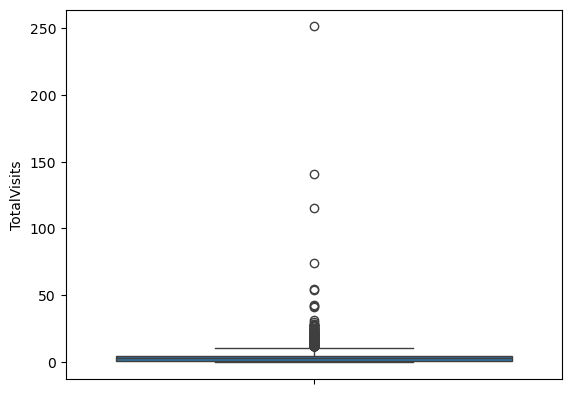

In [32]:
#plotting boxplot of TotalVisits
sns.boxplot(Leads_df.TotalVisits)
print(Leads_df.TotalVisits.quantile(0.9))
print(Leads_df.TotalVisits.quantile(0.95))
print(Leads_df.TotalVisits.quantile(0.99))
print(Leads_df.TotalVisits.quantile(0.999))

As per above boxplot and difference between Max and Q-0.99 is too high in comparison to differnce between Q-0.99 & Q-0.95
So we drop records for TotalVisits greater than 17, since they will affect are analysis

In [34]:
Leads_df=Leads_df[Leads_df.TotalVisits<=Leads_df.TotalVisits.quantile(0.99)]

In [35]:
Leads_df.shape

(9020, 17)

<Axes: ylabel='TotalVisits'>

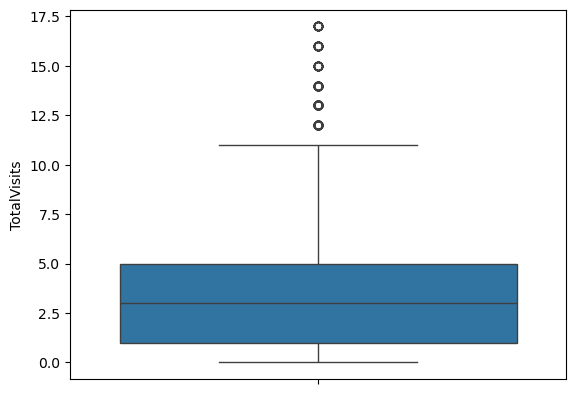

In [36]:
sns.boxplot(Leads_df.TotalVisits)

As we can see Outliers are removed from Totalvisits variables

1373.0
1556.0499999999993
1838.619999999999
2111.9810000000016


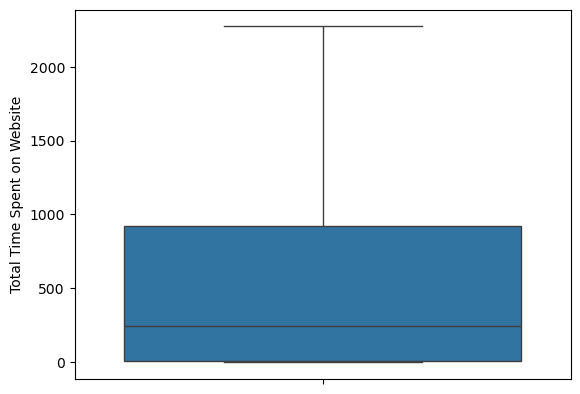

In [38]:
#plotting boxplot of TotalVisits
sns.boxplot(Leads_df["Total Time Spent on Website"])
print(Leads_df["Total Time Spent on Website"].quantile(0.9))
print(Leads_df["Total Time Spent on Website"].quantile(0.95))
print(Leads_df["Total Time Spent on Website"].quantile(0.99))
print(Leads_df["Total Time Spent on Website"].quantile(0.999))

As per above there is no outlier in Total Time Spent on Website

5.0
6.0
9.0
14.0


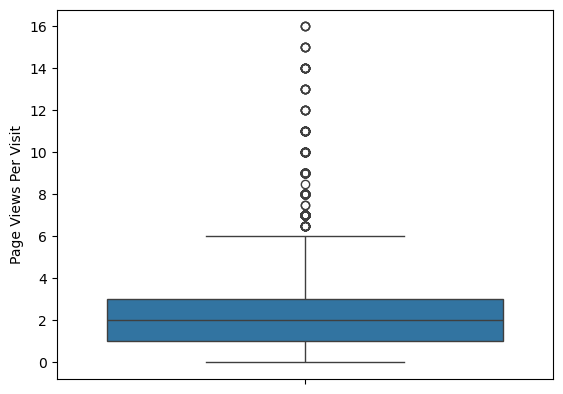

In [40]:
#plotting boxplot of TotalVisits
sns.boxplot(Leads_df["Page Views Per Visit"])
print(Leads_df["Page Views Per Visit"].quantile(0.9))
print(Leads_df["Page Views Per Visit"].quantile(0.95))
print(Leads_df["Page Views Per Visit"].quantile(0.99))
print(Leads_df["Page Views Per Visit"].quantile(0.999))

As per looking of this above 9 looks like outliers but in actually people can visits page per views

## Univariate Analysis

In [43]:
Leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,No,No,No,No,No,No,No,Modified


In [44]:
#Lets see Lead Origin
Leads_df["Lead Origin"].value_counts(normalize=True).sort_values(ascending=False)

Lead Origin
Landing Page Submission    0.534257
API                        0.395122
Lead Add Form              0.066408
Lead Import                0.004213
Name: proportion, dtype: float64

As we can see that mazor Lead comes Landing page submissions which is about 53.42% and through API 39.51

In [46]:
#Lets see Lead Source
Leads_df["Lead Source"].value_counts(normalize=True).sort_values(ascending=False)

Lead Source
Google               0.315965
Direct Traffic       0.278492
Olark Chat           0.194346
Organic Search       0.124723
Reference            0.051109
Welingak Website     0.014302
Referral Sites       0.013636
Facebook             0.004324
bing                 0.000665
google               0.000554
Click2call           0.000443
Press_Release        0.000222
Social Media         0.000222
Live Chat            0.000222
youtubechannel       0.000111
testone              0.000111
Pay per Click Ads    0.000111
welearnblog_Home     0.000111
WeLearn              0.000111
blog                 0.000111
NC_EDM               0.000111
Name: proportion, dtype: float64

From Above values we can see Major lead source is Google & Direct Traffic

In [48]:
#Lets see our target variable
Leads_df["Converted"].value_counts(normalize=True).sort_values(ascending=False)

Converted
0    0.621286
1    0.378714
Name: proportion, dtype: float64

As we can see from above figures conversion ratio is only 37.87% which is our Target variable

<Axes: xlabel='TotalVisits', ylabel='Count'>

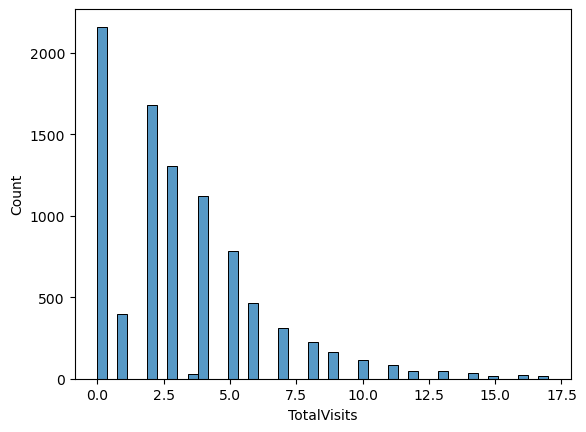

In [50]:
#LEts see now  numerical variables first one Total visits
sns.histplot(Leads_df["TotalVisits"])

<Axes: xlabel='Total Time Spent on Website', ylabel='Count'>

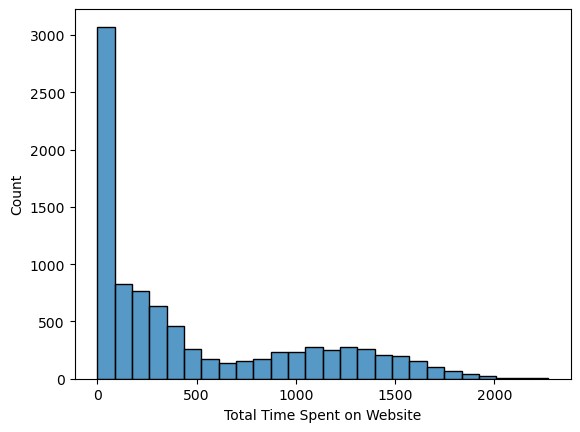

In [51]:
sns.histplot(Leads_df["Total Time Spent on Website"])

<Axes: xlabel='Page Views Per Visit', ylabel='Count'>

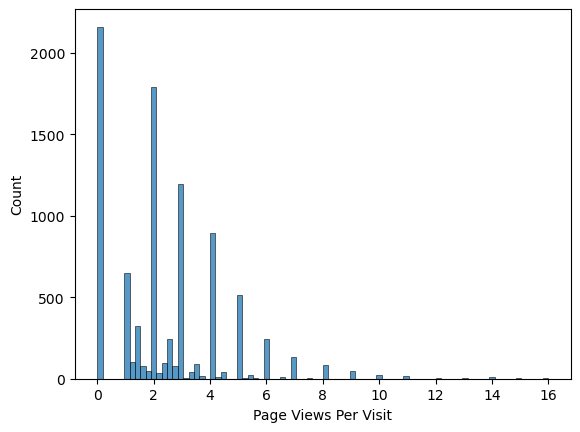

In [52]:
sns.histplot(Leads_df["Page Views Per Visit"])

As above all three charts showing same trends which is leads are on the left side of graph in terms of TotalVists, Page views per visit & Total time spend on website.

## Bivariate Analysis
Let's See how other variables are affecting target variables

In [55]:
Leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,No,No,No,No,No,No,No,Modified


<Axes: xlabel='Lead Origin', ylabel='Converted'>

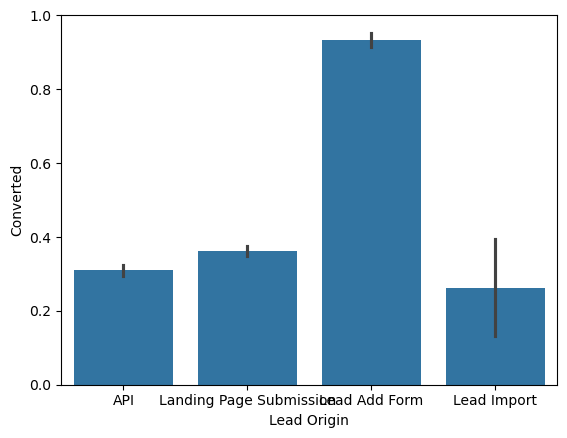

In [56]:
#Lets check between Lead Orignin vs Converted,
sns.barplot(data=Leads_df, x="Lead Origin", y="Converted")

In [57]:
Leads_df.groupby("Lead Origin")["Converted"].mean()

Lead Origin
API                        0.310606
Landing Page Submission    0.361071
Lead Add Form              0.933222
Lead Import                0.263158
Name: Converted, dtype: float64

As we can see from above Lead add form are converting the most though they are 6% in numbers in the whole data set but they are producing more than 93% conversions. so we should immediately target them .

<Axes: xlabel='Lead Source'>

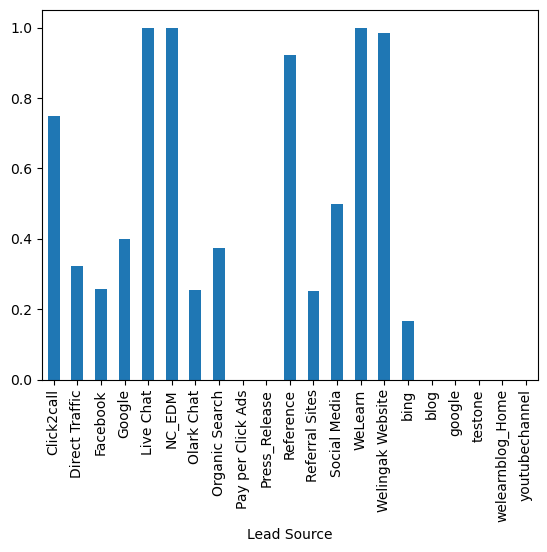

In [59]:
#Lets check between Lead Source vs Converted,
Leads_df.groupby("Lead Source")["Converted"].mean().plot.bar()

In [60]:
Leads_df.groupby("Lead Source")["Converted"].mean()

Lead Source
Click2call           0.750000
Direct Traffic       0.321656
Facebook             0.256410
Google               0.398947
Live Chat            1.000000
NC_EDM               1.000000
Olark Chat           0.254991
Organic Search       0.375111
Pay per Click Ads    0.000000
Press_Release        0.000000
Reference            0.921909
Referral Sites       0.252033
Social Media         0.500000
WeLearn              1.000000
Welingak Website     0.984496
bing                 0.166667
blog                 0.000000
google               0.000000
testone              0.000000
welearnblog_Home     0.000000
youtubechannel       0.000000
Name: Converted, dtype: float64

As we can see that all the leads from Live_chat, NC_EDM & we learn have 100% conversion but main chunk of leads from Google, Direct Traffic & Olark Chat which has very average conversion ratio which is around 30%

<Axes: xlabel='TotalVisits', ylabel='Converted'>

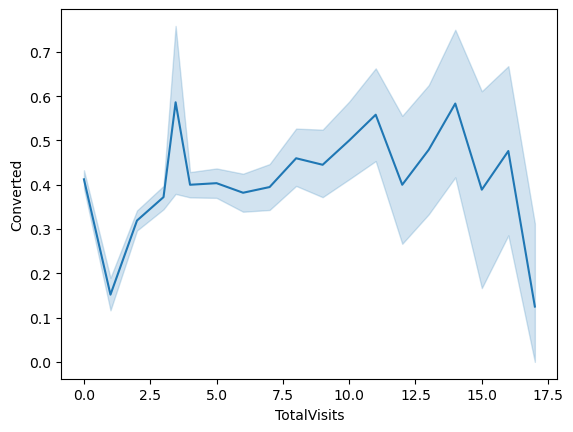

In [62]:
#Lets check between TotalVisits vs Converted,
sns.lineplot(data=Leads_df,x="TotalVisits", y="Converted")

As we can see from Above chart conversion ration is more than 50% on total visits count between 10-15 & between 2.5-5 nos


<Axes: xlabel='Page Views Per Visit', ylabel='Converted'>

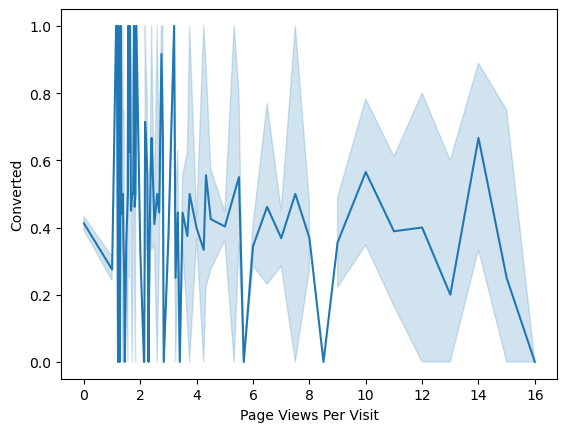

In [64]:
#Lets check between Page Views Per Visit vs Converted,
sns.lineplot(data=Leads_df,x="Page Views Per Visit", y="Converted")

this graph doesn't show any pattern 

## Multivariate Analysis
Let's See how other variables are affecting target variables

In [67]:
Leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,No,No,No,No,No,No,No,Modified


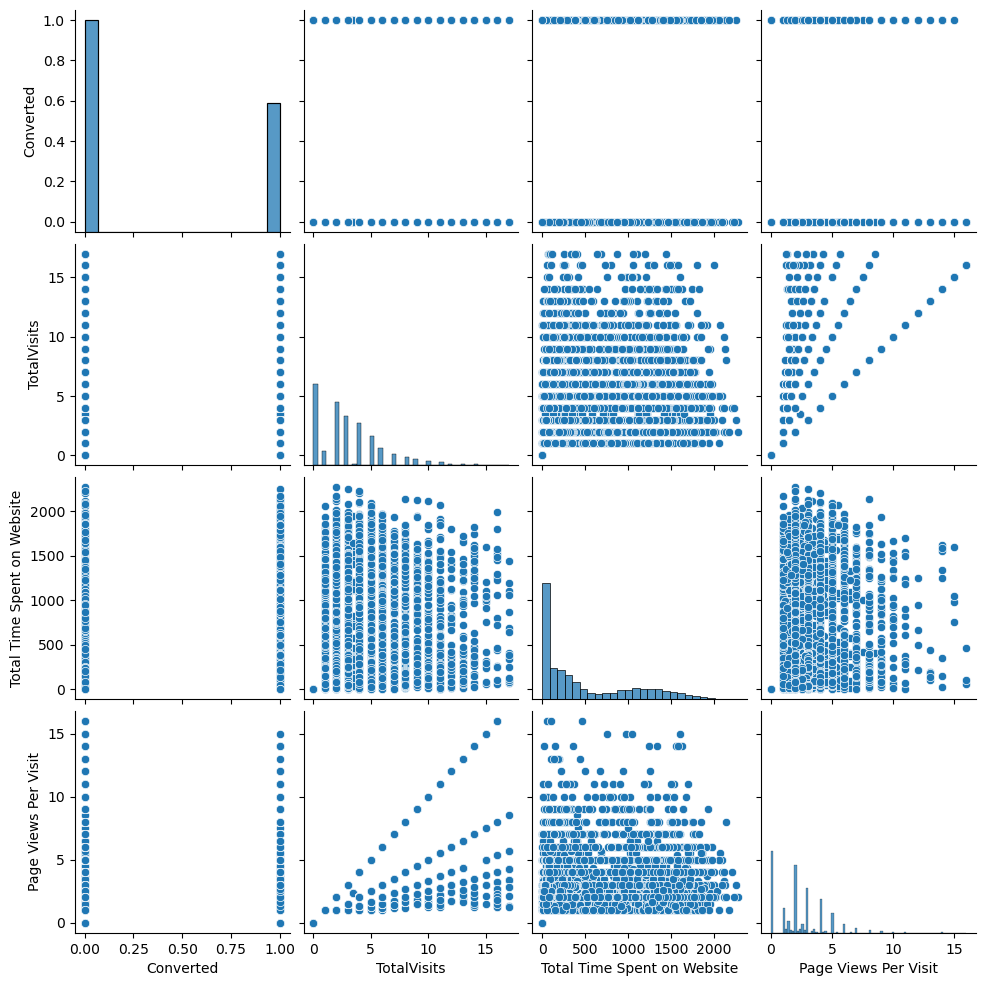

In [119]:
sns.pairplot(data=Leads_df)
plt.savefig('plot image.png')

# Feature conversions:-
Lets Convert Yes/no into 0 & 1

In [121]:
Leads_df["Do Not Email"]=Leads_df["Do Not Email"].map({"No":0,"Yes":1})
Leads_df["Do Not Call"]=Leads_df["Do Not Call"].map({"No":0,"Yes":1})
Leads_df["Search"]=Leads_df["Search"].map({"No":0,"Yes":1})
Leads_df["Newspaper Article"]=Leads_df["Newspaper Article"].map({"No":0,"Yes":1})
Leads_df["X Education Forums"]=Leads_df["X Education Forums"].map({"No":0,"Yes":1})
Leads_df["Newspaper"]=Leads_df["Newspaper"].map({"No":0,"Yes":1})
Leads_df["Digital Advertisement"]=Leads_df["Digital Advertisement"].map({"No":0,"Yes":1})
Leads_df["Through Recommendations"]=Leads_df["Through Recommendations"].map({"No":0,"Yes":1})
Leads_df["A free copy of Mastering The Interview"]=Leads_df["A free copy of Mastering The Interview"].map({"No":0,"Yes":1})

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [373]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(Leads_df[['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity']], drop_first=True, dtype=int)

# Adding the results to the master dataframe
Leads_df = pd.concat([Leads_df, dummy1], axis=1)

KeyError: "None of [Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity'], dtype='object')] are in the [columns]"

In [375]:
Leads_df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#### Dropping the repeated variables

In [126]:
Leads_df=Leads_df.drop(["Lead Origin",'Lead Source', 'Last Activity', 'Last Notable Activity'],axis=1)
Leads_df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [127]:
Leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9020 entries, 0 to 9239
Data columns (total 67 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Do Not Email                                        9020 non-null   int64  
 1   Do Not Call                                         9020 non-null   int64  
 2   Converted                                           9020 non-null   int64  
 3   TotalVisits                                         9020 non-null   float64
 4   Total Time Spent on Website                         9020 non-null   int64  
 5   Page Views Per Visit                                9020 non-null   float64
 6   Search                                              9020 non-null   int64  
 7   Newspaper Article                                   9020 non-null   int64  
 8   X Education Forums                                  9020 non-null   int64  
 9   Ne

## Test-Train Split

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
# Putting feature variable to X
X = Leads_df.drop("Converted", axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [131]:
# Putting response variable to y
y = Leads_df.Converted

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [132]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [134]:
from sklearn.preprocessing import StandardScaler

In [135]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2864,0,0,-0.408198,-0.145331,-0.167896,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6824,1,0,0.079413,-0.396748,0.012051,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7257,0,0,-0.073307,2.075209,0.318250,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8325,1,0,-1.077980,-0.884900,-1.140189,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5943,0,0,0.261584,0.095074,0.804396,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
### Checking the Conversion Ratio
Conversion = (sum(Leads_df['Converted'])/len(Leads_df['Converted'].index))*100
Conversion

37.87139689578714

We have conversion rate as of now is 37.87%

###  Looking at Correlations

In [139]:
# Let's see the correlation matrix 
plt.figure(figsize = (100,100))        # Size of the figure
sns.heatmap(Leads_df.corr(),annot = True)
plt.show()

In [140]:
#as we can see that there correlation value is not more than 0.6 so its ok


## Model Building
Feature Selection Using RFE

In [142]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [143]:
logreg = LogisticRegression()

## Model : 1

In [145]:
rfe = RFE(logreg, n_features_to_select=15)             #
rfe = rfe.fit(X_train, y_train)

In [146]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False,  True,  True,  True, False, False, False,
        True, False, False])

In [147]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 10),
 ('TotalVisits', False, 29),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 30),
 ('Search', False, 41),
 ('Newspaper Article', False, 17),
 ('X Education Forums', False, 49),
 ('Newspaper', False, 6),
 ('Digital Advertisement', False, 44),
 ('Through Recommendations', False, 9),
 ('A free copy of Mastering The Interview', False, 46),
 ('Lead Origin_Landing Page Submission', False, 38),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 15),
 ('Lead Source_Facebook', False, 45),
 ('Lead Source_Google', False, 20),
 ('Lead Source_Live Chat', False, 43),
 ('Lead Source_NC_EDM', False, 31),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 19),
 ('Lead Source_Pay per Click Ads', False, 35),
 ('Lead Source_Press_Release', False, 33),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 18)

In [148]:
col = X_train.columns[rfe.support_]

In [149]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Received',
       'Last Activity_Form Sub

##### Assessing the model with StatsModels

In [151]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6298
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2725.4
Date:                Tue, 17 Dec 2024   Deviance:                       5450.8
Time:                        21:56:23   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3695
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.1760      0.112    -10.523      0.000      -1.395      -0.957
Do Not Email                                      -1.3511      0.176     -7.670      0.000      -1.696      -1.006
Total Time Spent on Website                        1.1654      0.040     29.069      0.000       1.087       1.244
Lead Origin_Lead Add Form                          2.1035      1.249      1.684      0.092      -0.344       4.551
Lead Origin_Lead Import                            1.1270      0.420      2.682      0.007       0.303       1.951
Lead Source_Olark Chat                             1.0660      0.100     10.708      0.000       0.871       1.261
Lead Source_Reference                              2.2664      1.268      1.787      0.074      -0.219       4.752
Lead Source_Welingak Website                       4.2018      1.608      2.614      0.009       1.051       7.353
Last Activity_Email Opened                         1.2316      0.150      8.207      0.000       0.937       1.526
Last Activity_Had a Phone Conversation             1.5770      0.831      1.898      0.058      -0.051       3.205
Last Activity_SMS Sent                             1.5225      0.110     13.880      0.000       1.308       1.738
Last Notable Activity_Email Opened                -1.1495      0.172     -6.665      0.000      -1.487      -0.811
Last Notable Activity_Had a Phone Conversation     1.9020      1.369      1.389      0.165      -0.781       4.585
Last Notable Activity_Modified                    -1.2907      0.108    -11.937      0.000      -1.503      -1.079
Last Notable Activity_Olark Chat Conversation     -1.4542      0.325     -4.476      0.000      -2.091      -0.817
Last Notable Activity_Unreachable                  1.9725      0.534      3.692      0.000       0.925       3.020
==================================================================================================================
"""

In [152]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2864    0.220422
6824    0.522409
7257    0.789950
8325    0.986203
5943    0.272290
5688    0.891247
5373    0.238568
4733    0.257486
5814    0.446114
888     0.510124
dtype: float64

In [153]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.22042243, 0.52240919, 0.78994955, 0.98620258, 0.27228968,
       0.89124749, 0.2385676 , 0.25748614, 0.4461138 , 0.51012376])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [155]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead_id'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_id
0,0,0.220422,2864
1,1,0.522409,6824
2,0,0.789950,7257
3,1,0.986203,8325
4,0,0.272290,5943


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [157]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_id,predicted
0,0,0.220422,2864,0
1,1,0.522409,6824,1
2,0,0.789950,7257,1
3,1,0.986203,8325,1
4,0,0.272290,5943,0


In [158]:
from sklearn import metrics

In [159]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3478  460]
 [ 757 1619]]


In [160]:
# Predicted     Not_converted    Converted
# Actual
# Not_converted        3478      460
# Converted            757       1619 

In [161]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8072537218878683


We are getting accuracy of about 80.72% .


## Lets Check VIF

In [164]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [165]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,83.09
5,Lead Source_Reference,64.78
6,Lead Source_Welingak Website,19.46
7,Last Activity_Email Opened,7.13
10,Last Notable Activity_Email Opened,6.92
8,Last Activity_Had a Phone Conversation,2.23
11,Last Notable Activity_Had a Phone Conversation,2.21
12,Last Notable Activity_Modified,1.55
4,Lead Source_Olark Chat,1.50
1,Total Time Spent on Website,1.28


as we can see from above we are getting very high VIF of 83.09, 64.78 & 19.46 we will drop features one by one & then check accuracy

## Model : 2

In [168]:
col = col.drop('Lead Origin_Lead Add Form', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [169]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2727.2
Date:                Tue, 17 Dec 2024   Deviance:                       5454.4
Time:                        21:56:23   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3691
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.1690      0.112    -10.479      0.000      -1.388      -0.950
Do Not Email                                      -1.3543      0.176     -7.689      0.000      -1.700      -1.009
Total Time Spent on Website                        1.1654      0.040     29.095      0.000       1.087       1.244
Lead Origin_Lead Import                            1.1257      0.420      2.679      0.007       0.302       1.949
Lead Source_Olark Chat                             1.0647      0.099     10.708      0.000       0.870       1.260
Lead Source_Reference                              4.3678      0.230     19.016      0.000       3.918       4.818
Lead Source_Welingak Website                       6.3035      1.014      6.214      0.000       4.315       8.292
Last Activity_Email Opened                         1.2340      0.150      8.227      0.000       0.940       1.528
Last Activity_Had a Phone Conversation             1.5739      0.831      1.895      0.058      -0.054       3.202
Last Activity_SMS Sent                             1.5183      0.110     13.858      0.000       1.304       1.733
Last Notable Activity_Email Opened                -1.1575      0.172     -6.716      0.000      -1.495      -0.820
Last Notable Activity_Had a Phone Conversation     1.8981      1.369      1.387      0.166      -0.785       4.581
Last Notable Activity_Modified                    -1.2942      0.108    -11.979      0.000      -1.506      -1.082
Last Notable Activity_Olark Chat Conversation     -1.4603      0.325     -4.496      0.000      -2.097      -0.824
Last Notable Activity_Unreachable                  1.9656      0.534      3.679      0.000       0.918       3.013
==================================================================================================================
"""

In [170]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.22066397, 0.52196004, 0.79017903, 0.9861736 , 0.27256772,
       0.89161701, 0.23882277, 0.25749473, 0.44680376, 0.5118732 ])

In [171]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead_id'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_id
0,0,0.220664,2864
1,1,0.521960,6824
2,0,0.790179,7257
3,1,0.986174,8325
4,0,0.272568,5943


In [172]:
##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_id,predicted
0,0,0.220664,2864,0
1,1,0.521960,6824,1
2,0,0.790179,7257,1
3,1,0.986174,8325,1
4,0,0.272568,5943,0


In [173]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8067785872663922


## Lets Check VIF again

In [175]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_Email Opened,7.13
9,Last Notable Activity_Email Opened,6.92
7,Last Activity_Had a Phone Conversation,2.23
10,Last Notable Activity_Had a Phone Conversation,2.21
11,Last Notable Activity_Modified,1.55
3,Lead Source_Olark Chat,1.50
1,Total Time Spent on Website,1.28
8,Last Activity_SMS Sent,1.20
4,Lead Source_Reference,1.15
0,Do Not Email,1.11


Still we can see for Last Activity_Email Opened VIF is still in High as 7.13 so let's Drop it


## Model: 3

In [178]:
col = col.drop('Last Activity_Email Opened', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [179]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2759.8
Date:                Tue, 17 Dec 2024   Deviance:                       5519.5
Time:                        21:56:24   Pearson chi2:                 6.55e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3625
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -0.9866      0.107     -9.239      0.000      -1.196      -0.777
Do Not Email                                      -1.4942      0.173     -8.614      0.000      -1.834      -1.154
Total Time Spent on Website                        1.1681      0.040     29.318      0.000       1.090       1.246
Lead Origin_Lead Import                            1.1322      0.427      2.654      0.008       0.296       1.968
Lead Source_Olark Chat                             1.0389      0.099     10.529      0.000       0.845       1.232
Lead Source_Reference                              4.4651      0.230     19.419      0.000       4.014       4.916
Lead Source_Welingak Website                       6.4023      1.014      6.312      0.000       4.414       8.390
Last Activity_Had a Phone Conversation             1.2008      0.833      1.441      0.150      -0.433       2.834
Last Activity_SMS Sent                             1.3091      0.104     12.591      0.000       1.105       1.513
Last Notable Activity_Email Opened                -0.1035      0.117     -0.882      0.378      -0.333       0.126
Last Notable Activity_Had a Phone Conversation     2.0897      1.371      1.524      0.128      -0.598       4.777
Last Notable Activity_Modified                    -1.1207      0.104    -10.818      0.000      -1.324      -0.918
Last Notable Activity_Olark Chat Conversation     -1.6277      0.324     -5.022      0.000      -2.263      -0.992
Last Notable Activity_Unreachable                  1.7845      0.533      3.345      0.001       0.739       2.830
==================================================================================================================
"""

In [180]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.2209992 , 0.59873393, 0.79149413, 0.98518157, 0.27308316,
       0.78987273, 0.23922045, 0.25258614, 0.43987183, 0.55791832])

In [181]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead_id'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_id
0,0,0.220999,2864
1,1,0.598734,6824
2,0,0.791494,7257
3,1,0.985182,8325
4,0,0.273083,5943


In [182]:
##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_id,predicted
0,0,0.220999,2864,0
1,1,0.598734,6824,1
2,0,0.791494,7257,1
3,1,0.985182,8325,1
4,0,0.273083,5943,0


In [183]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8037694013303769


In [184]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_Had a Phone Conversation,2.22
9,Last Notable Activity_Had a Phone Conversation,2.21
3,Lead Source_Olark Chat,1.50
1,Total Time Spent on Website,1.28
10,Last Notable Activity_Modified,1.27
7,Last Activity_SMS Sent,1.19
4,Lead Source_Reference,1.14
0,Do Not Email,1.10
8,Last Notable Activity_Email Opened,1.10
11,Last Notable Activity_Olark Chat Conversation,1.06


Now All VIF are under 3 which is ideal for us now but still we p-values which are more so let's drop Last Notable Activity_Email Opened	which has 0.37 pz value 

## Model: 4

In [187]:
col = col.drop('Last Notable Activity_Email Opened', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [188]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2760.2
Date:                Tue, 17 Dec 2024   Deviance:                       5520.3
Time:                        21:56:24   Pearson chi2:                 6.55e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3625
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.0676      0.055    -19.417      0.000      -1.175      -0.960
Do Not Email                                      -1.4710      0.172     -8.572      0.000      -1.807      -1.135
Total Time Spent on Website                        1.1682      0.040     29.319      0.000       1.090       1.246
Lead Origin_Lead Import                            1.1072      0.426      2.601      0.009       0.273       1.942
Lead Source_Olark Chat                             1.0436      0.098     10.595      0.000       0.851       1.237
Lead Source_Reference                              4.4618      0.230     19.396      0.000       4.011       4.913
Lead Source_Welingak Website                       6.3991      1.014      6.308      0.000       4.411       8.387
Last Activity_Had a Phone Conversation             1.2202      0.833      1.465      0.143      -0.413       2.853
Last Activity_SMS Sent                             1.3749      0.073     18.941      0.000       1.233       1.517
Last Notable Activity_Had a Phone Conversation     2.1513      1.369      1.571      0.116      -0.533       4.835
Last Notable Activity_Modified                    -1.0587      0.076    -13.908      0.000      -1.208      -0.909
Last Notable Activity_Olark Chat Conversation     -1.5499      0.312     -4.970      0.000      -2.161      -0.939
Last Notable Activity_Unreachable                  1.8652      0.526      3.548      0.000       0.835       2.895
==================================================================================================================
"""

In [189]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.22489798, 0.59894166, 0.795225  , 0.98525017, 0.27757886,
       0.7861377 , 0.24334211, 0.25774374, 0.43611537, 0.53789429])

In [190]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead_id'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_id
0,0,0.224898,2864
1,1,0.598942,6824
2,0,0.795225,7257
3,1,0.985250,8325
4,0,0.277579,5943


In [191]:
##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_id,predicted
0,0,0.224898,2864,0
1,1,0.598942,6824,1
2,0,0.795225,7257,1
3,1,0.985250,8325,1
4,0,0.277579,5943,0


In [192]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8037694013303769


In [193]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_Had a Phone Conversation,2.22
8,Last Notable Activity_Had a Phone Conversation,2.21
3,Lead Source_Olark Chat,1.39
9,Last Notable Activity_Modified,1.26
1,Total Time Spent on Website,1.25
7,Last Activity_SMS Sent,1.18
4,Lead Source_Reference,1.11
0,Do Not Email,1.09
10,Last Notable Activity_Olark Chat Conversation,1.06
5,Lead Source_Welingak Website,1.04


still we p-values which are more so let's drop Last Activity_Had a Phone Conversation	which has 0.37 pz value 

## Model :5

In [196]:
col = col.drop('Last Activity_Had a Phone Conversation', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [197]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2761.3
Date:                Tue, 17 Dec 2024   Deviance:                       5522.6
Time:                        21:56:25   Pearson chi2:                 6.55e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3622
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.0667      0.055    -19.402      0.000      -1.174      -0.959
Do Not Email                                      -1.4748      0.172     -8.591      0.000      -1.811      -1.138
Total Time Spent on Website                        1.1692      0.040     29.350      0.000       1.091       1.247
Lead Origin_Lead Import                            1.1050      0.426      2.595      0.009       0.271       1.939
Lead Source_Olark Chat                             1.0420      0.098     10.584      0.000       0.849       1.235
Lead Source_Reference                              4.4818      0.230     19.495      0.000       4.031       4.932
Lead Source_Welingak Website                       6.3980      1.014      6.307      0.000       4.410       8.386
Last Activity_SMS Sent                             1.3726      0.073     18.913      0.000       1.230       1.515
Last Notable Activity_Had a Phone Conversation     3.3710      1.087      3.100      0.002       1.240       5.502
Last Notable Activity_Modified                    -1.0518      0.076    -13.851      0.000      -1.201      -0.903
Last Notable Activity_Olark Chat Conversation     -1.5504      0.312     -4.969      0.000      -2.162      -0.939
Last Notable Activity_Unreachable                  1.8644      0.526      3.546      0.000       0.834       2.895
==================================================================================================================
"""

In [198]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.22502276, 0.60456606, 0.79571363, 0.98514419, 0.27777209,
       0.79060201, 0.24349063, 0.25743729, 0.43564842, 0.53837667])

In [199]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead_id'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_id
0,0,0.225023,2864
1,1,0.604566,6824
2,0,0.795714,7257
3,1,0.985144,8325
4,0,0.277772,5943


In [200]:
##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_id,predicted
0,0,0.225023,2864,0
1,1,0.604566,6824,1
2,0,0.795714,7257,1
3,1,0.985144,8325,1
4,0,0.277772,5943,0


In [201]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8040861577446944


In [202]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Olark Chat,1.39
1,Total Time Spent on Website,1.25
8,Last Notable Activity_Modified,1.25
6,Last Activity_SMS Sent,1.18
4,Lead Source_Reference,1.10
0,Do Not Email,1.09
9,Last Notable Activity_Olark Chat Conversation,1.06
5,Lead Source_Welingak Website,1.04
2,Lead Origin_Lead Import,1.01
7,Last Notable Activity_Had a Phone Conversation,1.00


This Model is our Final model here we reduced features to 11 and we are getting accuracy 80.4% and along with that Pz is less than 2% and VIF is less than 2 for all the features
Now we can proceed with making predictions using this model only

In [204]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3478,  460],
       [ 777, 1599]], dtype=int64)

## Metrics other than accuracy, which are as follows:-
* sensitivity
* Specificity
* False Positive Rate
* Positive predictive value
* Negative Predictive Value

In [206]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [207]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.672979797979798

In [208]:
# Let us calculate specificity
TN / float(TN+FP)

0.8831894362620619

In [209]:
# Calculate false postive rate - predicting Converted when Lead does not have Converted
print(FP/ float(TN+FP))

0.11681056373793804


In [210]:
# positive predictive value 
print (TP / float(TP+FP))

0.7765905779504614


In [211]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8173913043478261


## Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [213]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [214]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

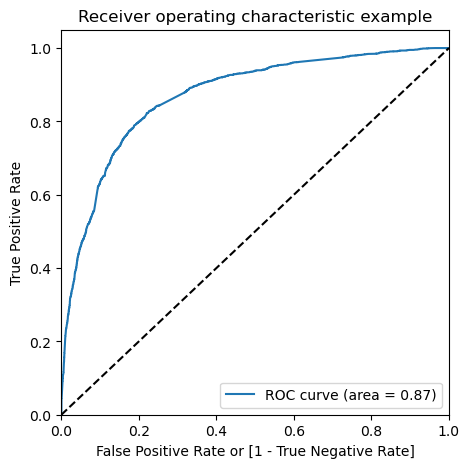

In [215]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Finding Optimal Cutoff Point

In [217]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.225023,2864,0,1,1,1,0,0,0,0,0,0,0
1,1,0.604566,6824,1,1,1,1,1,1,1,1,0,0,0
2,0,0.795714,7257,1,1,1,1,1,1,1,1,1,0,0
3,1,0.985144,8325,1,1,1,1,1,1,1,1,1,1,1
4,0,0.277772,5943,0,1,1,1,0,0,0,0,0,0,0


In [218]:
 ## Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.376307  1.000000  0.000000
0.1   0.1  0.534368  0.975589  0.268156
0.2   0.2  0.728540  0.909512  0.619350
0.3   0.3  0.792841  0.829125  0.770950
0.4   0.4  0.806937  0.756313  0.837481
0.5   0.5  0.804086  0.672980  0.883189
0.6   0.6  0.779062  0.542929  0.921534
0.7   0.7  0.767659  0.470118  0.947181
0.8   0.8  0.739626  0.359428  0.969020
0.9   0.9  0.704941  0.237374  0.987049


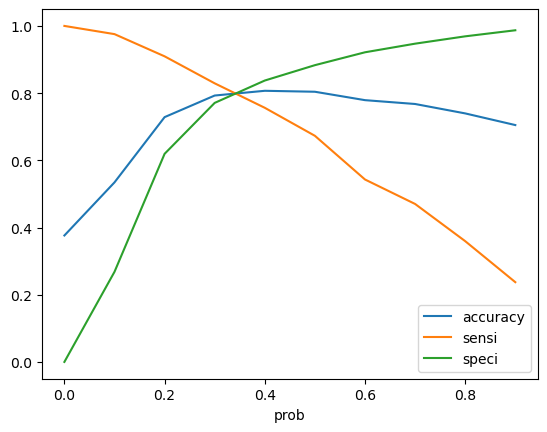

In [219]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [221]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.225023,2864,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.604566,6824,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.795714,7257,1,1,1,1,1,1,1,1,1,0,0,1
3,1,0.985144,8325,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.277772,5943,0,1,1,1,0,0,0,0,0,0,0,0


In [222]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8002850807728856

In [223]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3160,  778],
       [ 483, 1893]], dtype=int64)

In [224]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [225]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7967171717171717

In [226]:
# Let us calculate specificity
TN / float(TN+FP)

0.8024377856780092

In [227]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.19756221432199086


In [228]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7087233245975291


In [229]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8674169640406258


## Precision and Recall

## Precision¶
TP / TP + FP

In [232]:
# Let's see the Precision of our logistic regression model
TP / float(TP+FP)

0.7087233245975291

## Recall
TP / TP + FN

In [234]:
# Let's see the Recall of our logistic regression model
TP / float(TP+FN)

0.7967171717171717

## Precision and recall tradeoff

In [236]:
from sklearn.metrics import precision_recall_curve

In [237]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       1
 2       0
 3       1
 4       0
        ..
 6309    0
 6310    1
 6311    0
 6312    0
 6313    1
 Name: Converted, Length: 6314, dtype: int64,
 0       0
 1       1
 2       1
 3       1
 4       0
        ..
 6309    0
 6310    0
 6311    0
 6312    0
 6313    1
 Name: predicted, Length: 6314, dtype: int64)

In [238]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

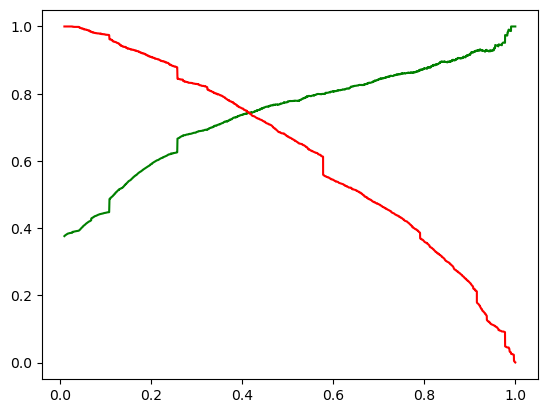

In [239]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set¶

In [241]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


In [242]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable
5130,1,-0.884900,0,1,0,0,0,0,1,0,0
6929,0,-0.831680,0,0,0,0,0,0,0,0,0
1471,0,1.087894,0,0,0,0,0,0,0,0,0
6521,0,-0.761944,0,0,0,0,1,0,0,0,0
7472,0,1.658628,0,0,0,0,1,0,0,0,0


In [243]:
X_test_sm = sm.add_constant(X_test)

## Making predictions on the test set

In [245]:
y_test_pred = res.predict(X_test_sm)

In [246]:
y_test_pred[:10]

5130    0.026963
6929    0.115154
1471    0.551147
6521    0.357784
7472    0.904239
7921    0.253914
3956    0.108016
6139    0.048365
8700    0.405850
5462    0.042762
dtype: float64

In [247]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [248]:
# Let's see the head
y_pred_1.head()

,0
5130,0.026963
6929,0.115154
1471,0.551147
6521,0.357784
7472,0.904239


In [249]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [250]:
# Putting CustID to index
y_test_df['Lead_ID'] = y_test_df.index

In [251]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [252]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [253]:
y_pred_final.head()

,Converted,Lead_ID,0
0,0,5130,0.026963
1,0,6929,0.115154
2,0,1471,0.551147
3,0,6521,0.357784
4,1,7472,0.904239


In [254]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_prob'})

In [255]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Lead_ID,Conversion_prob
0,0,5130,0.026963
1,0,6929,0.115154
2,0,1471,0.551147
3,0,6521,0.357784
4,1,7472,0.904239


In [256]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_prob.map(lambda x: 1 if x > 0.35 else 0)

In [257]:
y_pred_final.head()

,Converted,Lead_ID,Conversion_prob,final_predicted
0,0,5130,0.026963,0
1,0,6929,0.115154,0
2,0,1471,0.551147,1
3,0,6521,0.357784,1
4,1,7472,0.904239,1


In [258]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7823355506282336

In [259]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1313,  353],
       [ 236,  804]], dtype=int64)

In [260]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [261]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7730769230769231

In [262]:
# Let us calculate specificity
TN / float(TN+FP)

0.7881152460984394

In [378]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.2118847539015606
